<a href="https://colab.research.google.com/github/ThanhThuyHuynh/ML/blob/main/Lab_3_20130429_HuynhThiThanhThuy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Deadline: 23:59, 04/03/2023**

Mount Drive

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/Thực hành ML/ML Lab3'

Mounted at /content/gdrive
/content/gdrive/MyDrive/Thực hành ML/ML Lab3


 Import libraries

In [20]:
# code
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

# Task 1. 
The main aim of this task is to get familiar with the tasks of preprocessing data using Scikit-learn – a Python-based Machine Learning framework and Linear Regression.


For given 2 datasets (preprocessing_weather.csv, preprocessing_salary_dummy.csv), 
*   Identify issues with these datasets
*   Then, apply preprocessing techniques to the datasets


#Task 1.1. Dataset preprocessing_weather.csv

**Issues**:


1.   List item
2.   List item
3.   List item
4.   List item
....



**Preprocessing dataset**:

In [162]:

#code
dataset = pd.read_csv("data/preprocessing_weather.csv")
dataset


,id,outlook,temperature,humidity,windy,play
0,1,sunny,85,85,False,no
1,2,sunny,80,90,True,no
2,3,overcast,83,86,False,yes
3,4,rainy,NaN,96,False,yes
4,5,rainy,68,80,False,yes
5,6,rainy,65,70,True,no
6,7,overcast,64,65,True,yes
7,8,sunny,72,95,False,no
8,9,sunny,69,NaN,False,yes
9,10,rainy,75,80,False,yes


In [163]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
dataset[['temperature','humidity']] = imputer.fit_transform(dataset[['temperature','humidity']])
dataset


,id,outlook,temperature,humidity,windy,play
0,1,sunny,85.000000,85.000000,False,no
1,2,sunny,80.000000,90.000000,True,no
2,3,overcast,83.000000,86.000000,False,yes
3,4,rainy,73.846154,96.000000,False,yes
4,5,rainy,68.000000,80.000000,False,yes
5,6,rainy,65.000000,70.000000,True,no
6,7,overcast,64.000000,65.000000,True,yes
7,8,sunny,72.000000,95.000000,False,no
8,9,sunny,69.000000,82.538462,False,yes
9,10,rainy,75.000000,80.000000,False,yes


In [164]:
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
dataset[['temperature','humidity']] = imputer.fit_transform(dataset[['temperature','humidity']])
dataset

,id,outlook,temperature,humidity,windy,play
0,1,sunny,85.000000,85.000000,False,no
1,2,sunny,80.000000,90.000000,True,no
2,3,overcast,83.000000,86.000000,False,yes
3,4,rainy,73.846154,96.000000,False,yes
4,5,rainy,68.000000,80.000000,False,yes
5,6,rainy,65.000000,70.000000,True,no
6,7,overcast,64.000000,65.000000,True,yes
7,8,sunny,72.000000,95.000000,False,no
8,9,sunny,69.000000,82.538462,False,yes
9,10,rainy,75.000000,80.000000,False,yes


#Task 1.2. Dataset preprocessing_salary_dummy.csv

**Issues**:


1.   List item
2.   List item
3.   List item
4.   List item
....



**Preprocessing dataset**:

In [165]:
#code
dataset = pd.read_csv("data/preprocessing_salary_dummy.csv")
dataset.columns = dataset.columns.str.strip()
# dataset.columns
dataset

,No,Country,Age,Salary,Purchased
0,1,France,44.0,72000.0,No
1,2,Spain,27.0,48000.0,Yes
2,3,Germany,30.0,54000.0,No
3,4,Spain,38.0,61000.0,No
4,5,Germany,40.0,NaN,Yes
5,6,France,35.0,58000.0,Yes
6,7,Spain,NaN,52000.0,No
7,8,France,48.0,79000.0,Yes
8,9,Germany,50.0,83000.0,No
9,10,France,37.0,67000.0,Yes


In [166]:
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
dataset[['Age','Salary']] = imputer.fit_transform(dataset[['Age','Salary']])

dataset

,No,Country,Age,Salary,Purchased
0,1,France,44.0,72000.0,No
1,2,Spain,27.0,48000.0,Yes
2,3,Germany,30.0,54000.0,No
3,4,Spain,38.0,61000.0,No
4,5,Germany,40.0,48000.0,Yes
5,6,France,35.0,58000.0,Yes
6,7,Spain,27.0,52000.0,No
7,8,France,48.0,79000.0,Yes
8,9,Germany,50.0,83000.0,No
9,10,France,37.0,67000.0,Yes


# **Task 2**. Simple Linear Regression in Scikit-Learn
---
# **Usage:**
> **Step 1**: build a model
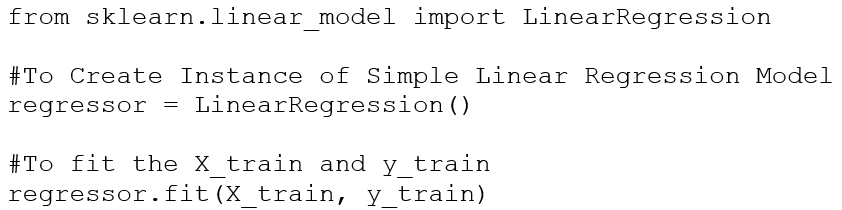

> **Step 2**: test the model

*   With test set:
`y_pred = regressor.predict(X_test)`

*   With a single value ("predict" method always expects a 2D array as the format of its inputs)
`regressor.predict([[12]])`

> **Step 3**: 
*   get w0, w1 , w2, …,
-- W0: `regressor.intercept_`
-- w1, w2, …: `regressor.coef_`
*   R^2 score: sum of squared r(i)
`r(i) = y(i) - f(x(i))`: residual of ith instance


> **Metrics**:
*   metrics.explained_variance_score(y_test, y_pred)
*   metrics.mean_absolute_error(y_ test, y_pred) 
*   metrics.mean_squared_error(y_ test, y_pred[, ...])
*   metrics.mean_squared_log_error(y_ test, y_pred)
*   metrics.median_absolute_error(y_ test, y_pred)
*   metrics.r2_score(y_ test, y_pred[, ...])




---



# Tasks
The main aim of these tasks is to get familiar with Linear Regression problems. Apply LinearRegression to the following datasets. Note the error obtained and coefficients
*   **dataset1.csv** - a synthetic dataset including 5 points (1-dimensional data) with one target
*   **dataset2.csv** - a synthetic dataset including 1000 points (3-dimensional data) with one target variable. The variables are named x1, x2, x3, y. y is the variable to be regressed. Split the dataset into training set and test set (70% for training set and 30% for test set). 


# Task 2.1. dataset1.csv


In [125]:
#code
dataset = pd.read_csv("data/dataset1.csv")
X_Train = dataset[['x']]
y_Train = dataset[['y']]
dataset
# x_Train
# y_Train

,x,y
0,1,1
1,2,3
2,4,3
3,3,2
4,5,5


In [126]:
regressor = LinearRegression()
regressor.fit(X_Train, y_Train)
print(regressor.intercept_) #c
print(regressor.coef_) #m

[0.4]
[[0.8]]


In [127]:
y_pred = regressor.predict(X_Train)
y_pred.flatten()

array([1.2, 2. , 3.6, 2.8, 4.4])

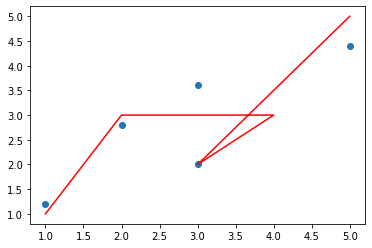

In [133]:
plt.plot(X_Train, y_Train, color = "r")
plt.scatter(y_Train, y_pred)
plt.show()

In [134]:
r2 = metrics.r2_score(y_Train, y_pred)
r2

0.7272727272727273

# Task 2.2. dataset2.csv


In [145]:
#code
dataset = pd.read_csv("data/dataset2.csv")
dataset

,id,x1,x2,x3,y
0,1,2.41710,0.83595,0.72469,18.21900
1,2,1.98150,-1.01800,-1.06400,0.55271
2,3,1.82850,0.49281,-0.89035,7.00510
3,4,1.50480,-1.74070,-1.72290,-7.06310
4,5,0.27489,-0.31811,-0.56168,0.74380
...,...,...,...,...,...
594,595,1.64550,0.63758,-0.75519,7.71100
595,596,-1.16320,0.17321,-2.23150,-9.95440
596,597,-1.61920,-0.57279,-2.26420,-14.47000
597,598,-0.34407,1.86730,-2.22070,-0.66676


In [146]:
X = dataset.drop(columns = 'y')
X

,id,x1,x2,x3
0,1,2.41710,0.83595,0.72469
1,2,1.98150,-1.01800,-1.06400
2,3,1.82850,0.49281,-0.89035
3,4,1.50480,-1.74070,-1.72290
4,5,0.27489,-0.31811,-0.56168
...,...,...,...,...
594,595,1.64550,0.63758,-0.75519
595,596,-1.16320,0.17321,-2.23150
596,597,-1.61920,-0.57279,-2.26420
597,598,-0.34407,1.86730,-2.22070


In [147]:
y = dataset['y']

In [148]:
X_Train, X_Test, y_Train, y_Test = train_test_split(X, y, test_size = 0.4, random_state= 1)

In [ ]:
lr = LinearRegression()
lr.fit(X_Train, y_Train)

In [150]:
c = lr.intercept_
c

4.000041234170112

In [151]:
m = lr.coef_
m

array([-7.98871262e-08,  2.99999730e+00,  3.99998420e+00,  4.99999070e+00])

In [159]:
y_pred_train = lr.predict(X_Train)
y_pred_train

array([-9.22631206e+00,  9.32574940e+00, -1.72040046e+01,  7.08245715e+00,
        4.67889137e+00,  8.54728358e+00, -4.21155887e+00,  6.73097444e+00,
        2.43318644e+00, -1.44697320e+01,  1.68486004e+01, -6.43569266e+00,
        1.32948099e+01, -2.21605365e+01, -4.10794291e+00,  1.61763543e+01,
       -6.40409915e+00, -1.76718394e+01,  8.50923982e+00, -1.56826238e+01,
        9.07881690e+00,  6.73349382e+00, -4.40083265e+00,  5.15609639e+00,
       -9.26614686e+00,  3.88102078e+00,  4.79470427e+00,  5.20851039e-01,
        1.60527749e+01,  9.01621845e+00, -1.42862224e+00, -1.36709567e+01,
       -1.45689298e+01, -5.33689635e+00,  5.65657019e-03,  1.42672214e+01,
        6.66299333e+00,  1.28334682e+01, -4.55599645e+00, -1.05180565e+01,
        1.27305724e+01, -1.78970632e+00,  9.82853221e-01, -7.71427459e+00,
        7.69831432e+00,  3.21815801e+00, -1.86274679e+00, -1.26007771e+00,
        5.52561700e-01,  1.65341855e+01,  1.97143286e+00,  1.16694165e+01,
        1.29672493e+01,  

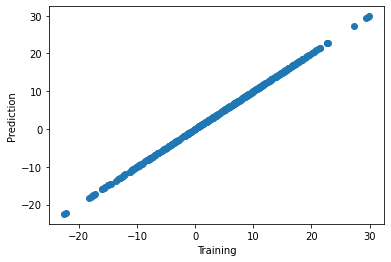

In [160]:
# plt.plot(X_Train, y_Train, color = "r")
plt.scatter(y_Train, y_pred_train)
plt.xlabel("Training")
plt.ylabel("Prediction")
plt.show()

In [161]:
r2 = metrics.r2_score(y_Train, y_pred_train)
r2

0.9999999993979843

# Task 2.3. Apply LinearRegression to the following dataset:
*   Red wine quality: https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv . The dataset includes info about the chemical properties of different types of wine and how they relate to overall quality. 



In [106]:
#code
dataset = pd.read_csv("data/Task3_winequality-red.csv", sep=";")
dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [107]:
dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [108]:
X = dataset.drop(columns = 'quality')
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [110]:
y = dataset['quality']

In [111]:
X_Train, X_Test, y_Train, y_Test = train_test_split(X, y, test_size = 0.3, random_state= 1)

In [ ]:
lr = LinearRegression()
lr.fit(X_Train, y_Train)

In [113]:
c = lr.intercept_
c


36.54693744462804

In [114]:
m = lr.coef_
m

array([ 4.58527906e-02, -1.17640321e+00, -2.87778222e-01,  1.64922765e-02,
       -1.80636202e+00,  6.07141383e-03, -3.77903394e-03, -3.26155240e+01,
       -3.75065394e-01,  8.87110235e-01,  2.67134606e-01])

In [115]:
y_pred = lr.predict(X_Train)
y_pred

array([4.73726373, 5.6793453 , 5.2715194 , ..., 5.40080408, 5.07869972,
       6.54049346])

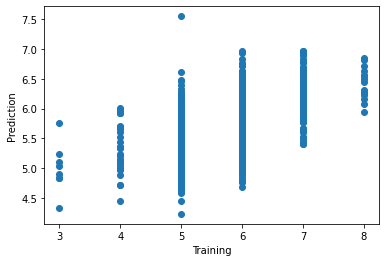

In [116]:
plt.scatter(y_Train, y_pred)
plt.xlabel("Training")
plt.ylabel("Prediction")
plt.show()

In [117]:
r2 = metrics.r2_score(y_Train,y_pred)
r2

0.3732759065136656

# Task 2.4. Apply LinearRegression to the following dataset:
*   Energy efficiency: https://archive.ics.uci.edu/ml/datasets/Energy+efficiency.




In [83]:
#code
dataset = pd.read_excel("data/Task4_ENB2012_data.xlsx")
dataset

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


In [84]:
dataset.isnull().sum()

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
Y2    0
dtype: int64

In [88]:
X = dataset.drop(columns =['Y1','Y2'])
X

,X1,X2,X3,X4,X5,X6,X7,X8
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0
...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5


In [ ]:
y1 = dataset['Y1']
y1

In [ ]:
y2 = dataset['Y2']
y2

In [98]:
X_Train, X_test, y_Train, y_Test = train_test_split(X, y2, test_size = 0.3, random_state=0)

In [ ]:
lr = LinearRegression()
lr.fit(X_Train,y_Train)

In [100]:
c = lr.intercept_
c

87.58799128963122

In [101]:
m = lr.coef_
m

array([-6.42094267e+01, -6.01059730e-02,  2.55229955e-02, -4.28144842e-02,
        4.21026016e+00,  1.32796083e-01,  1.43883341e+01,  1.03879132e-02])

In [102]:
y_pred = lr.predict(X_Train)
y_pred

array([34.32761395, 16.06410576, 19.93035057, 14.6706085 , 19.18933548,
       35.48060846, 29.84140236, 32.44534392, 19.62624106, 38.03514395,
       34.71561429, 29.45340202, 32.48792442, 19.41337599, 35.45983264,
       32.17840053, 29.69411108, 32.37590416, 19.31174365, 32.42321687,
       19.73826132, 31.18488405, 32.29177201, 19.15817174, 31.56249648,
       19.44453973, 16.59443019, 33.73113451, 14.86244733, 34.45002212,
       33.88192251, 16.20728976, 17.53024604, 35.73581272, 33.76990226,
       30.09249933, 30.17507354, 30.0097625 , 28.81709665, 17.60078703,
       17.33519486, 29.4326262 , 37.92312369, 34.66695037, 17.66304213,
       15.40098526, 34.61398195, 34.53415428, 14.43618007, 12.40033812,
       16.45124619, 17.51985813, 31.30729222, 32.31254783, 15.85866667,
       33.60872634, 30.30651841, 28.00508429, 32.20052758, 14.70887542,
       15.29935292, 13.33615398, 13.90585565, 40.09176172, 32.43360479,
       31.44008831, 31.74444822, 27.7187163 , 18.0895598 , 17.86

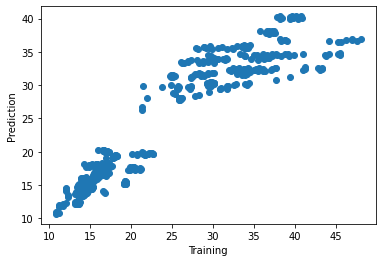

In [103]:
plt.scatter(y_Train, y_pred)
plt.xlabel("Training")
plt.ylabel("Prediction")
plt.show()

In [104]:
r2 = metrics.r2_score(y_Train, y_pred)
r2

0.8850152802502099

# Finally,
Save a copy in your Github. Remember renaming the notebook.